# Explore here

In [1]:
# Your code here

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from sklearn.metrics import *
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib







ds1 = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv").iloc[:,1:]
pd.set_option('display.precision', 2)
pd.set_option('display.max_columns', None)

ds1.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.69,-73.96,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.80,-73.94,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
ds1.shape

(48895, 15)

In [3]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               

In [4]:
ds1.loc[:,"last_review"]

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [5]:
ds = ds1.drop(["last_review","reviews_per_month"], axis = 1)

ds.shape

(48895, 13)

In [6]:
ds.duplicated().sum()

0

In [7]:
ds.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.89e+04,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00
mean,6.76e+07,40.73,-73.95,152.72,7.03,23.27,7.14,112.78
std,7.86e+07,0.05,0.05,240.15,20.51,44.55,32.95,131.62
min,2.44e+03,40.50,-74.24,0.00,1.00,0.00,1.00,0.00
25%,7.82e+06,40.69,-73.98,69.00,1.00,1.00,1.00,0.00
50%,3.08e+07,40.72,-73.96,106.00,3.00,5.00,1.00,45.00
75%,1.07e+08,40.76,-73.94,175.00,5.00,24.00,2.00,227.00
max,2.74e+08,40.91,-73.71,10000.00,1250.00,629.00,327.00,365.00


In [8]:
# elimino los valores menores a 0 para poder aplicar .log()
ds = ds[ds["price"] > 0]


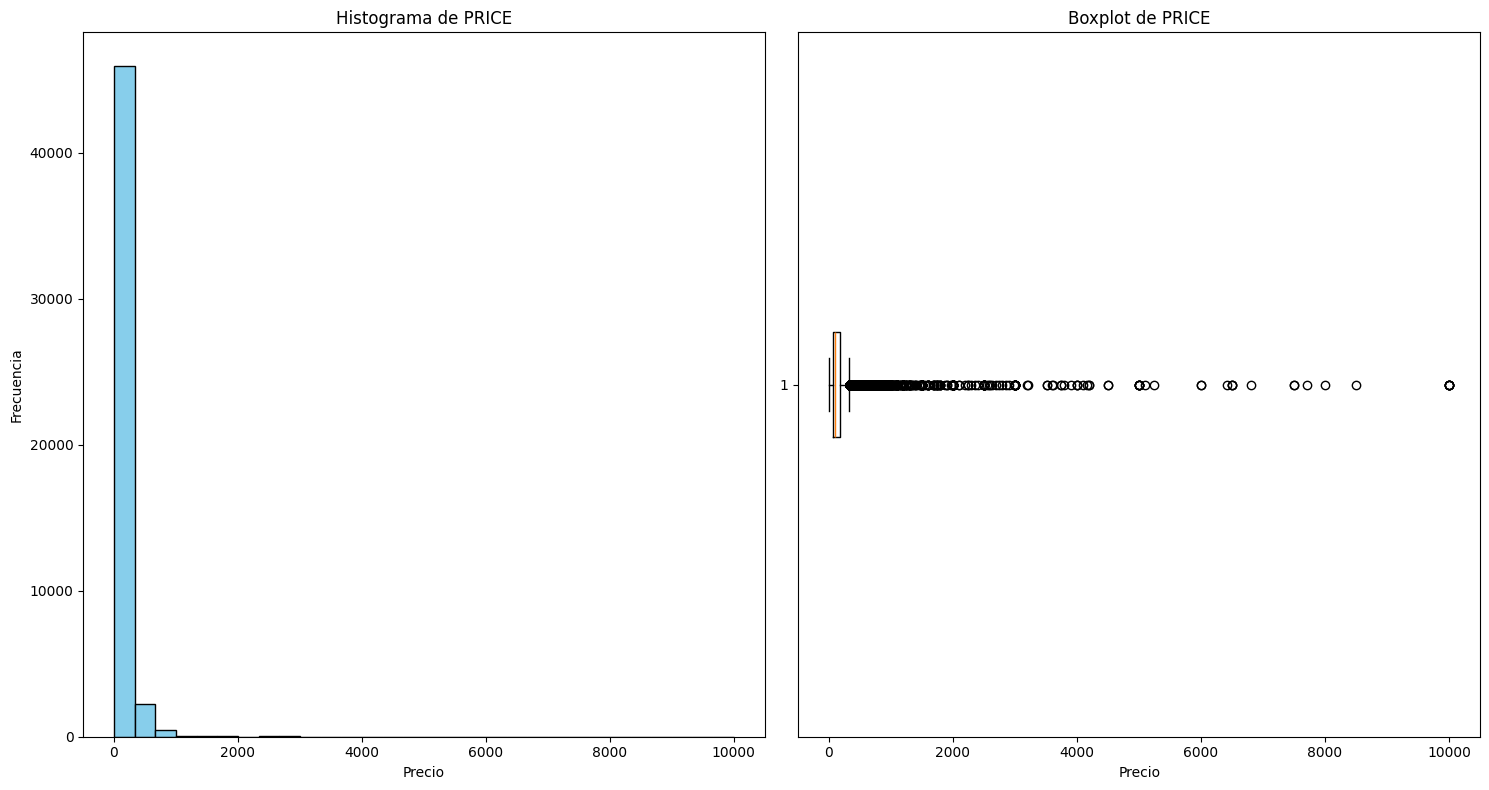

In [9]:

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].hist(ds["price"], bins=30, color="skyblue", edgecolor = "black");
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')


ax[1].boxplot(ds['price'], vert=False);
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')


plt.tight_layout()
plt.show()

In [10]:
#"La simetría de la varíable que queremos predecir puede ser un problema..."
#Creación de Columna con los precios transformados a escala logarítmica

ds["precio_log"] = np.log(ds["price"]);

ds["precio_log"] 



0        5.00
1        5.42
2        5.01
3        4.49
4        4.38
         ... 
48890    4.25
48891    3.69
48892    4.74
48893    4.01
48894    4.50
Name: precio_log, Length: 48884, dtype: float64

In [11]:
ds.info();

<class 'pandas.core.frame.DataFrame'>
Index: 48884 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48868 non-null  object 
 1   host_id                         48884 non-null  int64  
 2   host_name                       48863 non-null  object 
 3   neighbourhood_group             48884 non-null  object 
 4   neighbourhood                   48884 non-null  object 
 5   latitude                        48884 non-null  float64
 6   longitude                       48884 non-null  float64
 7   room_type                       48884 non-null  object 
 8   price                           48884 non-null  int64  
 9   minimum_nights                  48884 non-null  int64  
 10  number_of_reviews               48884 non-null  int64  
 11  calculated_host_listings_count  48884 non-null  int64  
 12  availability_365                48884

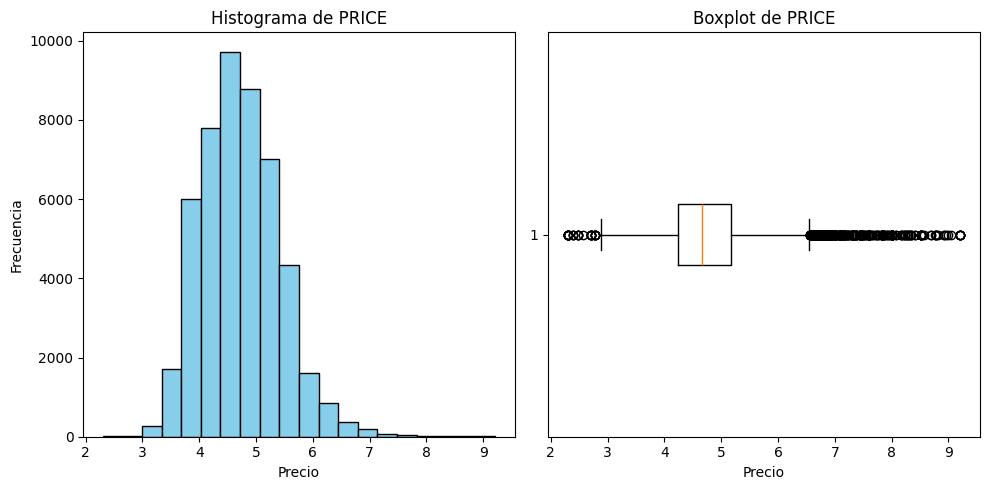

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(ds['precio_log'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(ds['precio_log'], vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [13]:
# % de valores nulos por columna.
ds.isnull().mean()*100

name                              0.03
host_id                           0.00
host_name                         0.04
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
calculated_host_listings_count    0.00
availability_365                  0.00
precio_log                        0.00
dtype: float64

In [14]:
print(f"Columnas con Valores Nulos: {ds.isnull().any(axis=0).sum()}")
columnas_con_nulos = ds.columns[ds.isnull().any()]
pd.Series(columnas_con_nulos)



Columnas con Valores Nulos: 2


0         name
1    host_name
dtype: object

In [15]:
#Filas con valores nules
print(sum(ds.isnull().any(axis=1))) #??? No entiendo el axis en este caso si axis=0 son filas 

# % de filas con valores nulos -> Para tomar la desición sobre Imputar los valores faltantes o Eliminar las filas con valores nulos.
print(sum(ds.isnull().any(axis=1))/len(ds)*100)

#Columnas con Valores Nulos
print(ds.isnull().any().sum())

37
0.07568938712053024
2


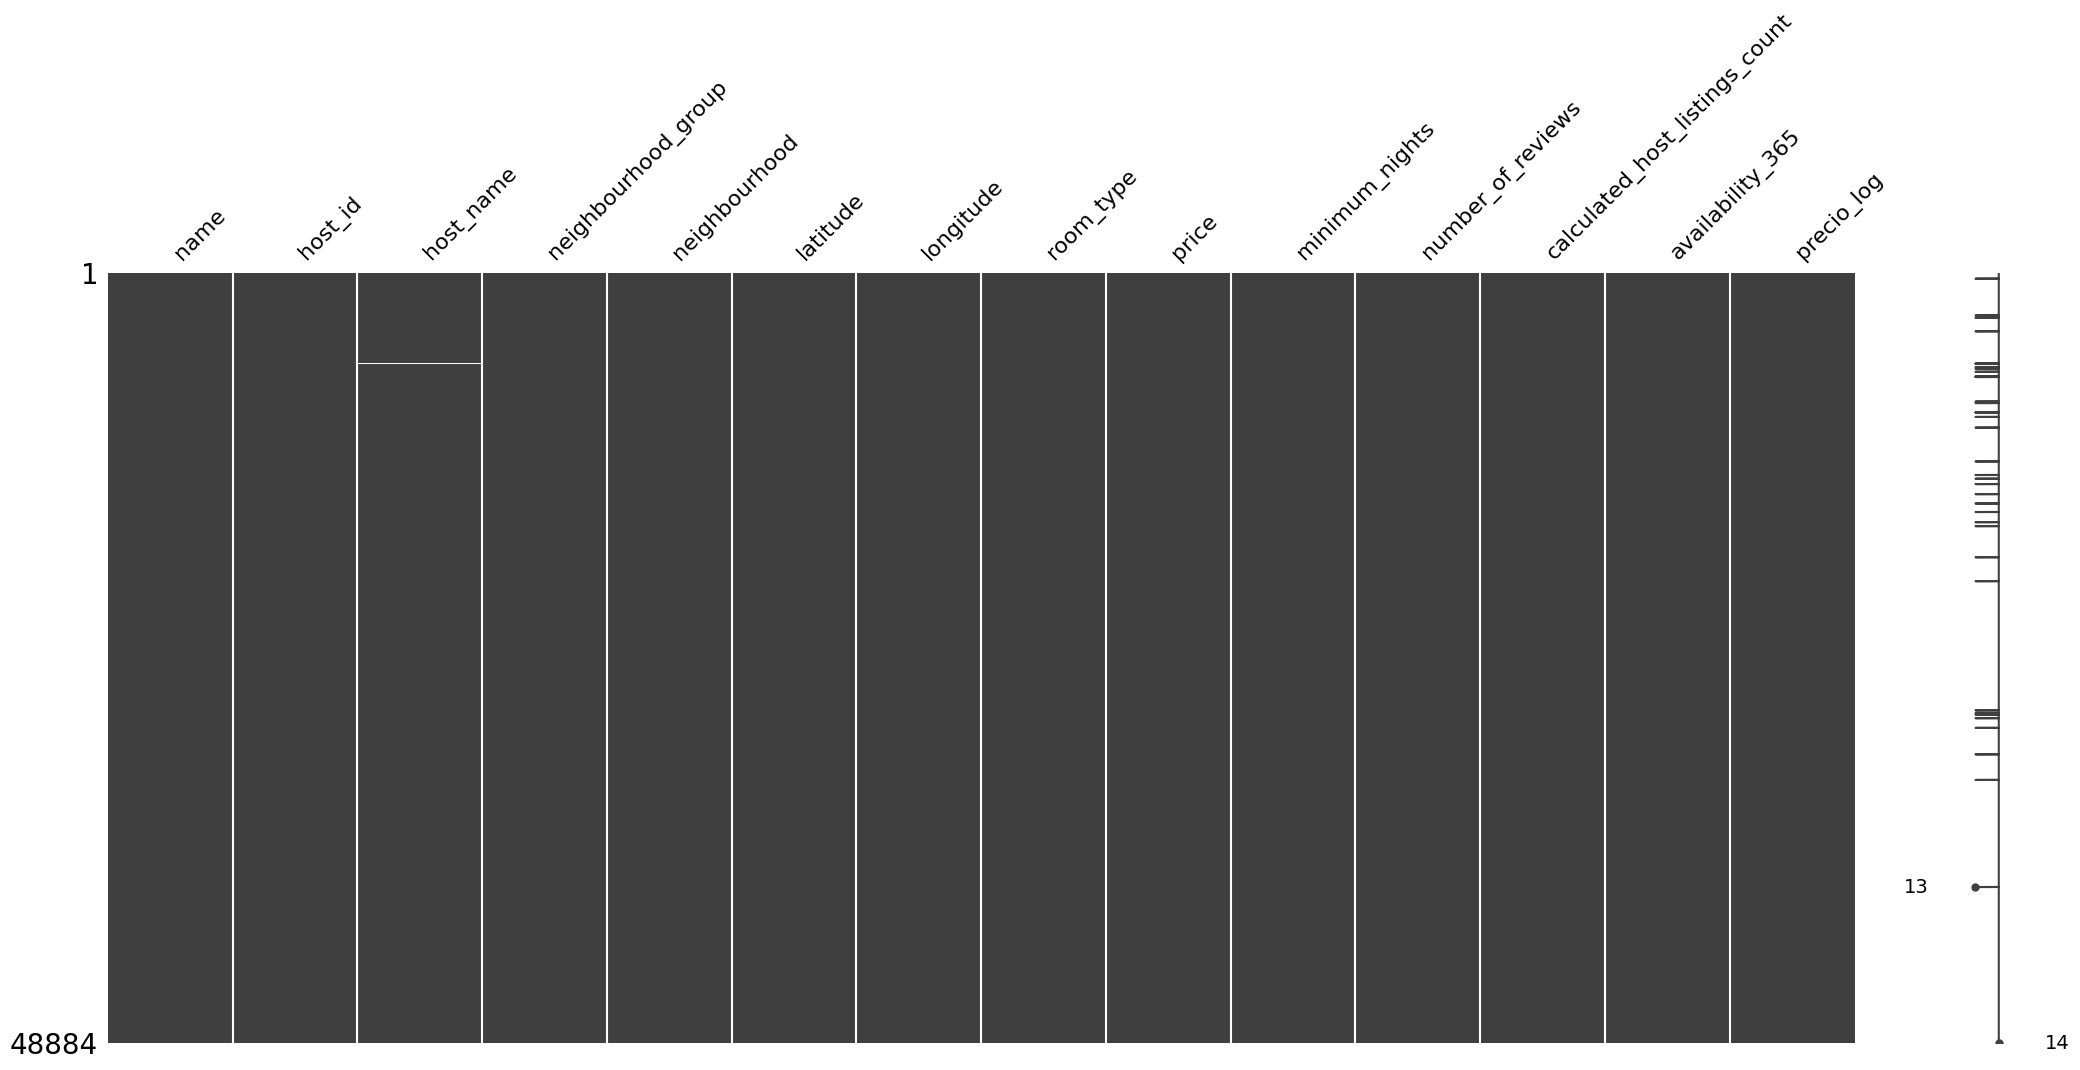

In [16]:
import missingno as msno

msno.matrix(ds);

In [17]:
from sklearn.impute import KNNImputer

#La asignación de vecinos es teniendo en cuenta el orden original de DS o la fórmula ordena las variables según algún criterio ?

# No hay valores faltaantes que sean numéricos en el DS




In [18]:
# No estoy seguro si me tengo que cargar las variables tipo Object / string o si debo asignarles un equivalente numérico
# Por lo pronto me las cargo para poder avanzar, si no no puedo calcular la distancia de cook.
ds.dtypes

name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
precio_log                        float64
dtype: object

In [19]:
#Elimino las columnas con valores no numéricos
ds_new = ds.drop(["name", "host_name", "neighbourhood_group", "neighbourhood", "room_type" ], axis=1, inplace=False)

In [20]:
ds_new.dtypes

host_id                             int64
latitude                          float64
longitude                         float64
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
precio_log                        float64
dtype: object

In [21]:
# Búsqueda de Observaciones Influyentes (Valores Atípicos / Outliers) mediante la Distancia de Cook

#Definición de Variables: v. predictoras (X) / v. objetivo (Y)
x = ds_new.drop(["price", "precio_log"], axis = 1)  # Variables Predictorias
y= ds_new["precio_log"]  # Variable Dependiente / Objetivo

# Ajuste al Modelo:                # ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data). ?
x = sm.add_constant(x)            # Debo eliminar las variables no Numérias ?
modelo = sm.OLS(y, x).fit()


# Instancia de la influencia y cálculo de la Distancia de Cook
distancia_cook = modelo.get_influence().cooks_distance

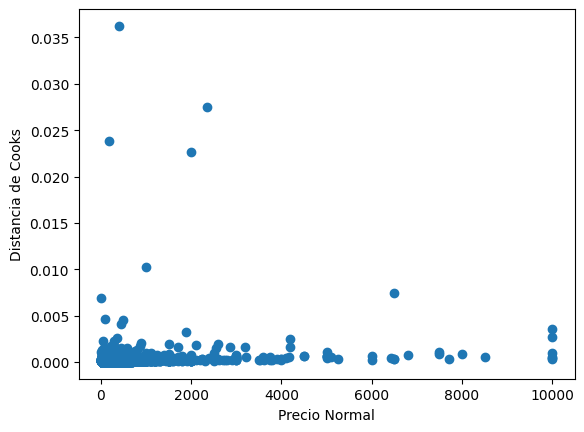

In [22]:
#Plotear los resultados
plt.scatter(x=ds_new.price, y=distancia_cook[0]) # No termino de entender por qué se pone el [0]
plt.xlabel("Precio Normal")
plt.ylabel("Distancia de Cooks")
plt.show()

In [23]:
#posiciones en donde se detecta una distancia de cook extraordinaria 
np.where(distancia_cook[0] > 0.020)

(array([ 2854,  5767, 17811, 44418]),)

In [24]:
ds_new.iloc[44408]

host_id                           2.20e+08
latitude                          4.08e+01
longitude                        -7.40e+01
price                             1.89e+02
minimum_nights                    2.90e+01
number_of_reviews                 0.00e+00
calculated_host_listings_count    3.27e+02
availability_365                  3.33e+02
precio_log                        5.24e+00
Name: 44419, dtype: float64

In [25]:
#Elimino las filas con estos valores outliers
ds_new.drop([44408], axis=0, inplace=True)

In [26]:
#Posiciones con Valores Atípicos
ds_new = ds_new[ds_new.price < 9500]

In [27]:
#Winzorización -> solo variables numéricas NO binaries
#búsqueda de columnas con valores binarios 

col_binarias = ds_new[(ds_new == 0)|(ds_new == 1)].dropna(axis=1).columns
col_binarias 

#No hay columnas con valores binarios

#¿Esto detecta solo si hay 0 y/o 1 en la columna? O con que haya cualquier 0 o 1 ya lo detecta ?

Index([], dtype='object')

In [28]:
ds_new.nunique()


host_id                           37448
latitude                          19046
longitude                         14715
price                               671
minimum_nights                      109
number_of_reviews                   394
calculated_host_listings_count       47
availability_365                    366
precio_log                          671
dtype: int64

In [29]:
ds_new.apply(lambda x: x.skew())

host_id                            1.21
latitude                           0.24
longitude                          1.28
price                             15.09
minimum_nights                    21.85
number_of_reviews                  3.69
calculated_host_listings_count     7.93
availability_365                   0.76
precio_log                         0.58
dtype: float64

In [30]:
# Winzorización

def winzorizar_columna(columna, lower, upper):
    q1 = columna.quantile(lower)
    q3 = columna.quantile(upper)
    iqr_value = q3 - q1
    lim_inf = q1 - 1.5 * iqr_value
    lim_sup = q3 + 1.5 * iqr_value
    columna = columna.clip(lower=lim_inf, upper=lim_sup)
    
    return columna


for column in ds_new.columns:
    ds_new[column] = winzorizar_columna(ds_new[column], 0.25, 0.75)


In [31]:
#El skew tras aplicar la Winzorización
ds_new.apply(lambda x: x.skew())

host_id                           1.18
latitude                          0.24
longitude                         0.53
price                             1.02
minimum_nights                    1.29
number_of_reviews                 1.23
calculated_host_listings_count    1.15
availability_365                  0.76
precio_log                        0.32
dtype: float64

In [32]:
ds_new.describe()


,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,precio_log
count,4.89e+04,48877.00,48877.00,48877.00,48877.00,48877.00,48877.00,48877.00,48877.00
mean,6.74e+07,40.73,-73.95,132.99,3.82,15.67,1.61,112.78,4.72
std,7.80e+07,0.05,0.04,83.49,3.32,20.35,0.95,131.63,0.67
min,2.44e+03,40.58,-74.05,10.00,1.00,0.00,1.00,0.00,2.84
25%,7.82e+06,40.69,-73.98,69.00,1.00,1.00,1.00,0.00,4.23
50%,3.08e+07,40.72,-73.96,106.00,3.00,5.00,1.00,45.00,4.66
75%,1.07e+08,40.76,-73.94,175.00,5.00,24.00,2.00,227.00,5.16
max,2.57e+08,40.87,-73.87,334.00,11.00,58.50,3.50,365.00,6.56


In [33]:
#Cálculo de variable adicionales ??
#No se me ocurren

In [34]:
#Relaciones entre características

corr = ds_new.corr()
corr.style.background_gradient(cmap="coolwarm").format(precision=3)

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,precio_log
host_id,1.000,0.020,0.116,0.013,-0.064,-0.127,0.183,0.203,-0.019
latitude,0.020,1.000,0.110,0.075,0.031,-0.026,-0.001,-0.011,0.083
longitude,0.116,0.110,1.000,-0.365,-0.121,0.081,0.078,0.073,-0.388
price,0.013,0.075,-0.365,1.000,0.053,-0.066,-0.056,0.113,0.962
minimum_nights,-0.064,0.031,-0.121,0.053,1.000,-0.210,0.182,0.157,0.042
number_of_reviews,-0.127,-0.026,0.081,-0.066,-0.210,1.000,0.052,0.191,-0.047
calculated_host_listings_count,0.183,-0.001,0.078,-0.056,0.182,0.052,1.000,0.414,-0.091
availability_365,0.203,-0.011,0.073,0.113,0.157,0.191,0.414,1.000,0.097
precio_log,-0.019,0.083,-0.388,0.962,0.042,-0.047,-0.091,0.097,1.000


In [35]:
corr.precio_log #Tiene correlaciones super bajas con el resto de las variables

host_id                          -0.02
latitude                          0.08
longitude                        -0.39
price                             0.96
minimum_nights                    0.04
number_of_reviews                -0.05
calculated_host_listings_count   -0.09
availability_365                  0.10
precio_log                        1.00
Name: precio_log, dtype: float64

In [36]:
pd.Series(corr[corr.precio_log.abs() > 0.1].index)

0     longitude
1         price
2    precio_log
dtype: object

In [37]:
vif = pd.Series([variance_inflation_factor(corr.values, i) for i in range(corr.shape[1])], index= ds_new.columns)
vif

# ¿Cómo discrimina el código cuales son las variables predictoras y cuale es el objetivo?

host_id                             1.82
latitude                            1.23
longitude                           2.79
price                             792.25
minimum_nights                      1.79
number_of_reviews                   1.93
calculated_host_listings_count      2.87
availability_365                    3.09
precio_log                        820.54
dtype: float64

In [38]:
# Me cargúe "price" con un Inplace True
ds_new

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,precio_log
0,2787,40.65,-73.97,149,1,9.0,3.5,365,5.00
1,2845,40.75,-73.98,225,1,45.0,2.0,355,5.42
2,4632,40.81,-73.94,150,3,0.0,1.0,365,5.01
3,4869,40.69,-73.96,89,1,58.5,1.0,194,4.49
4,7192,40.80,-73.94,80,10,9.0,1.0,0,4.38
...,...,...,...,...,...,...,...,...,...
48890,8232441,40.68,-73.95,70,2,0.0,2.0,9,4.25
48891,6570630,40.70,-73.93,40,4,0.0,2.0,36,3.69
48892,23492952,40.81,-73.95,115,10,0.0,1.0,27,4.74
48893,30985759,40.76,-73.99,55,1,0.0,3.5,2,4.01


In [39]:
# Divido el DF en variables de entrenamiento y testeo con train_test_split

x= ds_new.drop(["precio_log"], axis = 1)
y = ds_new["precio_log"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)



In [40]:
# Vamos a usar un método embebido que nos informe de la importancia de las características
# Crea un modelo XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror')

# Entrena el modelo en los datos de entrenamiento
model.fit(x_train, y_train)

# Calcula la importancia de las características
feature_importances = model.feature_importances_

# Asocia las importancias con los nombres de las características
feature_names = x.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Ordena las características por importancia (de mayor a menor)
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Imprime la importancia de las características (número adimensional, las características se comparan entre sí en términos de su contribución relativa a la predicción)
for feature, importance in sorted_feature_importance.items():
    print(f'Feature: {feature}, Importance: {importance*100}')

Feature: price, Importance: 97.80453443527222
Feature: minimum_nights, Importance: 0.4025622271001339
Feature: calculated_host_listings_count, Importance: 0.32905545085668564
Feature: number_of_reviews, Importance: 0.3180810948833823
Feature: longitude, Importance: 0.2969633089378476
Feature: latitude, Importance: 0.2957139629870653
Feature: availability_365, Importance: 0.2862907946109772
Feature: host_id, Importance: 0.2668021945282817


In [41]:
#Búsqueda de Variables con baja correlación y baja importancia:

def get_vars_to_delete(d_imp, corr, imp_cut=0.005, corr_cut=0.1):
  ls_vars_low_corr = corr[corr.precio_log.abs()<=corr_cut].index
  return [var for var in ls_vars_low_corr if d_imp[var]<=imp_cut]

In [42]:
vars_to_drop = get_vars_to_delete(sorted_feature_importance, corr, imp_cut=0.01, corr_cut=0.15)
vars_to_drop

['host_id',
 'latitude',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365']

In [43]:
x_train.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,3.67e+04,36657.00,36657.00,36657.00,36657.00,36657.00,36657.00,36657.00
mean,6.74e+07,40.73,-73.95,133.21,3.82,15.73,1.61,112.81
std,7.79e+07,0.05,0.04,83.33,3.32,20.38,0.95,131.44
min,2.57e+03,40.58,-74.05,10.00,1.00,0.00,1.00,0.00
25%,7.83e+06,40.69,-73.98,69.00,1.00,1.00,1.00,0.00
50%,3.11e+07,40.72,-73.96,109.00,2.00,5.00,1.00,46.00
75%,1.07e+08,40.76,-73.94,175.00,5.00,24.00,2.00,227.00
max,2.57e+08,40.87,-73.87,334.00,11.00,58.50,3.50,365.00


In [44]:
#Escalado de Datos

scaler = MinMaxScaler().fit(x_train) # Es importante ajustar el escalador usando SIEMPRE los datos de entrenamiento.
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

print(f"X TRAIN -->  Mínimo: {x_train_sc.min()} - Máximo: {x_test_sc.max()}")

print(f"X TEST -->   Mínimo: {x_test_sc.min()} - Máximo: {x_test_sc.max()}")

X TRAIN -->  Mínimo: 0.0 - Máximo: 1.0
X TEST -->   Mínimo: -5.178130371166611e-07 - Máximo: 1.0


In [45]:
type(x_test_sc)

x_train_sc = pd.DataFrame(x_train_sc, columns = x_train.columns)

x_test_sc = pd.DataFrame(x_test_sc, columns = x_test.columns)

print(y_train.shape[0])

print(x_test.shape)



36657
(12220, 8)


No puedo instalar Lazy Predict, por ende voy a usar el algoritmo de LGBMRegressor, al igual que en la clase.

In [46]:
# Haremos una Búsqeuda Aleatoria para buscar la mejor combinación de Hiperparámetros (optimización) 
# Randomized Search CV selecciona aleatoriamente combinaciones de valores para los hiperparámetros y evalúa su rendimiento.

# 1er Paso: llamar al algoritmo.
model = lgb.LGBMRegressor()

# 2do Paso: definir el espacio de búsqueda con un diccionario. 
param_dic = {'boosting_type': ['gbdt','dart','rf'],
              'num_leaves': np.arange(20, 250, 30),
              'max_depth':np.arange(20, 250, 30),
              'learning_rate':np.logspace(-3,0,5)}

# 3er Paso: ejecutar la Búsqueda Aleatoría, pasando los Datos de Entrenamiento Escalados: 
random_search = RandomizedSearchCV(estimator= model, param_distributions=param_dic, n_iter=50, cv=5, random_state=10, n_jobs=1, scoring='neg_root_mean_squared_error', verbose=1)
random_search.fit(x_train_sc, y_train)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.722292


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003408 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.720307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29326, number of used features: 8
[LightGBM] [Info] Start training from score 4.723343
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.722292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.720307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.722292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.720307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002794 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.722292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.720307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.722292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.720307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.722292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.720307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.722292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.720307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.722292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.720307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.722292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.720307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/lightgbm-python/src/boosting/rf.hpp, line 36 .

[LightGBM] [Fatal] Check failed: (config->bagging_freq > 0 && config->bagging_fraction < 1.0f && config->bagging_fraction > 0.0f) || (config->feature_fraction < 1.0f && config->feature_fraction > 0.0f) at /__w/1/s/

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.722292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.720307
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins

/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
60 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/lightgbm/sklearn.py", line 1092, in fit
    super().fit(
  File "/home/vscode/.local/lib/python3.10/site-packages/lightgbm/sklearn.py", line 885, in fit
    self._Booster = train(
  File "/home/vscode/.local/lib/python3.10/site-packages/lig

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 36657, number of used features: 8
[LightGBM] [Info] Start training from score 4.722877


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'boosting_type': ['gbdt', 'dart', 'rf'],
                                        'learning_rate': array([0.001     , 0.00562341, 0.03162278, 0.17782794, 1.        ]),
                                        'max_depth': array([ 20,  50,  80, 110, 140, 170, 200, 230]),
                                        'num_leaves': array([ 20,  50,  80, 110, 140, 170, 200, 230])},
                   random_state=10, scoring='neg_root_mean_squared_error',
                   verbose=1)

In [47]:
# Mostramos los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Mostramos el rendimiento del mejor modelo
print("Mejor puntuación (  en el conjunto de prueba:")
print(-1*random_search.best_score_)


Mejores hiperparámetros encontrados:
{'num_leaves': 20, 'max_depth': 20, 'learning_rate': 0.1778279410038923, 'boosting_type': 'gbdt'}
Mejor puntuación (  en el conjunto de prueba:
0.06216330964892689


In [48]:
# Luego de la búsqueda aleatoria, hacemos una búsqeuda más específica con los HiperParámetros obtenidos con RandomizedSearchCV
# Se refina el Espacio de Búsqueda seún los resultados obtenidos.
#Búsqueda Centrada a través de Búsqueda Bayesiana:  

# 1er Paso: llamar al algoritmo.
model = lgb.LGBMRegressor()

# 2do Paso: definir el espacio de búsqueda con un diccionario (teniendo en cuenta los HP obtenidos con .best_para)
param_dic = {'boosting_type': ['gbdt'],
              'num_leaves': np.arange(5, 30, 8),
              'max_depth':np.arange(5, 30, 8),
              'learning_rate':[0.09, 0.12 ,0.15,0.17,0.2,]}

# 3er Paso: ejecutar la Búsqueda Aleatoría, pasando los Datos de Entrenamiento Escalados: 
bay_search = BayesSearchCV(model,
    param_dic,
    n_iter=50,  
    cv=5,       
    n_jobs=-1,
    random_state=42,
    scoring='neg_root_mean_squared_error',  # Métrica a optimizar
    verbose=2)

bay_search.fit(x_train_sc, y_train)





Fitting 5 folds for each of 1 candidates, totalling 5 fits


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.722292
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002275 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 29325, number of used features: 8
[LightGBM] [Info] Start training from score 4.720307
[CV] END boosting_type=gbdt, learning_rate=0.17, max_depth=29, num_leaves=13; total time=   0.3s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003728 seconds.
You can set `force_col_wise=true` to remove the overh

BayesSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1, random_state=42,
              scoring='neg_root_mean_squared_error',
              search_spaces={'boosting_type': ['gbdt'],
                             'learning_rate': [0.09, 0.12, 0.15, 0.17, 0.2],
                             'max_depth': array([ 5, 13, 21, 29]),
                             'num_leaves': array([ 5, 13, 21, 29])},
              verbose=2)

In [49]:
print("Mejores hiperparámetros encontrados:")
print(bay_search.best_params_)

# Mostramos el rendimiento del mejor modelo
print("Mejor puntuación (RMSE) en el conjunto de prueba:")
print(-1*bay_search.best_score_)

Mejores hiperparámetros encontrados:
OrderedDict([('boosting_type', 'gbdt'), ('learning_rate', 0.12), ('max_depth', 21), ('num_leaves', 13)])
Mejor puntuación (RMSE) en el conjunto de prueba:
0.061265589230971904


In [50]:
model = bay_search.best_estimator_
